In [84]:
import MDAnalysis as mda
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def get_resid(index_lst, u):
    selection_str = "index "
    for index in index_lst:
        selection_str = selection_str + str(index) + " "
    res = u.select_atoms(selection_str)
    resid = list(set(res.resids))
    return resid

In [4]:
def read_file(file):
    data = []
    for line in file.readlines():
        frame_data = {}
        indices = line.split()[2:]
        i = 0
        while i < len(indices):
            Ca = indices[i]
            prot_or_lipid = indices[i+1]
            if Ca in frame_data.keys():
                frame_data[Ca].append(prot_or_lipid)
            else:
                frame_data[Ca] = [prot_or_lipid]
            i = i+2
        data.append(frame_data)
    return data

In [5]:
traj_dir_Ca = '/Users/quynhnguyen/OneDrive/research/Bcl-xl/bclxL_Unprot_1_2_CLPC_50mM_CaCl2/analysis/traj/'
u_Ca = mda.Universe(traj_dir_Ca + 'bclxL_Unprot_1_2_CLPC_50mM_CaCl2_from_VMD.psf', traj_dir_Ca + 'BclxL_Unprot_1_2_CLPC_50mM_CaCl2-0-20834-every1000.dcd')

/Users/quynhnguyen/opt/anaconda3/envs/Hv1/lib/python3.11/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [8]:
data_dir = "/Users/quynhnguyen/OneDrive/research/Bcl-xl/bclxL_Unprot_1_2_CLPC_50mM_CaCl2/analysis/traj/"
Ca_lipid_file = open(data_dir+ "BclxL_Unprot_1_2_CLPC_50mM_CaCl2_Ca_lipid.dat", 'r')
Ca_prot_file = open(data_dir + "BclxL_Unprot_1_2_CLPC_50mM_CaCl2_Ca_prot.dat",'r')

In [9]:
with open (data_dir+"CAL_index.txt", 'r') as file:
    Ca_indices = file.readline().split()

In [10]:
with open(data_dir + "BclxL_Unprot_1_2_CLPC_50mM_CaCl2_Ca_lipid.dat") as file:
    Ca_lipid_data = read_file(file)

In [11]:
Ca_lipid_data = read_file(Ca_lipid_file)
Ca_prot_data = read_file(Ca_prot_file)

In [110]:
Ca_prot_lipid = {}
for i in range(0, len(Ca_lipid_data)):
    for key in Ca_prot_data[i].keys():
        #If the key found in Ca_prot_data and Ca_lipid_data
        if key in Ca_lipid_data[i].keys():
            the_prot = get_resid(Ca_prot_data[i][key], u_Ca)
            the_lipid = get_resid(Ca_lipid_data[i][key], u_Ca)
            new_key = get_resid([key], u_Ca)[0]
            if new_key in Ca_prot_lipid.keys():
                Ca_prot_lipid[new_key] = Ca_prot_lipid[new_key] + [i ,the_prot, the_lipid]
            else:
                Ca_prot_lipid[new_key] = [i, the_prot, the_lipid]


In [95]:
def count_protein(a_list):
    proteins = []
    i = 1
    while i < len(a_list)-2:
        res = a_list[i]
        i = i+3
        proteins.append(res)
    sr = pd.Series(proteins)
    return sr.value_counts()

In [103]:
proteins = count_protein(Ca_prot_lipid[9])
print(proteins.index[0])

[42]


In [117]:
count_dict = {}
x = []
y = []
count = []
for key,value in Ca_prot_lipid.items():
    x.append(key)
    count = count_protein(value).index.to_list()
    print(count)
print(x)
print(y)

[[52]]
[[107]]
[[156]]
[[158]]
[]
[[202], [202, 76], [76]]
[[61]]
[]
[[42]]
[[202, 76], [202], [76]]
[[39]]
[[61]]
[[153, 156], [153]]
[[46]]
[[42]]
[[92, 95]]
[[39]]
[[61]]
[[207]]
[[39]]
[[61]]
[[42]]
[]
[[96, 208]]
[[133]]
[]
[[107]]
[[129]]
[[19]]
[[133]]
[]
[]
[[19]]
[142, 31, 83, 113, 53, 56, 147, 10, 120, 23, 36, 166, 111, 103, 9, 68, 153, 17, 139, 41, 135, 52, 19, 129, 104, 110, 88, 94, 67, 122, 1, 90, 112]
[]


/var/folders/cm/4vn4kyns4kgghjx65t7cmzfw0000gn/T/ipykernel_14721/4166577759.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr = pd.Series(proteins)
/var/folders/cm/4vn4kyns4kgghjx65t7cmzfw0000gn/T/ipykernel_14721/4166577759.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr = pd.Series(proteins)
/var/folders/cm/4vn4kyns4kgghjx65t7cmzfw0000gn/T/ipykernel_14721/4166577759.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr = pd.Series(proteins)
/var/folders/cm/4vn4kyns4kgghjx65t7cmzfw0000gn/T/ipykernel_14721/4166577759.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

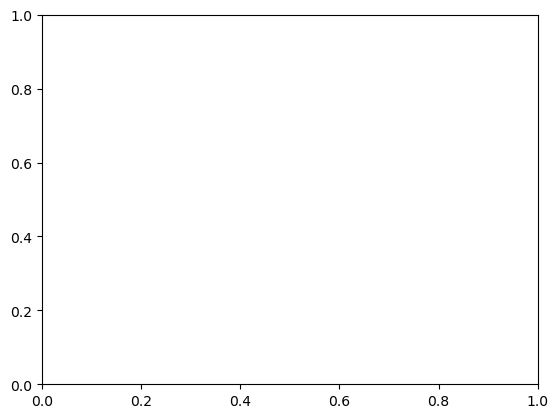

In [86]:
fig = plt.figure()
ax = fig.subplots()
ax.scatter()

In [216]:
sr = pd.Series([32, [[52], [47]], 33, [[52], [47]], 34, [[52], [47]], 35, [[52], [47]]])
print(sr)
#for value in sr.value_counts().index:   
    #print(isinstance(value, list))

def count(a_list):
    list_to_make_sr = []
    for item in a_list:
        if isinstance(item, int) == False:
            list_to_make_sr.append(item)
    sr = pd.Series(list_to_make_sr)
    #print(sr.value_counts())
    return sr.value_counts()

0              32
1    [[52], [47]]
2              33
3    [[52], [47]]
4              34
5    [[52], [47]]
6              35
7    [[52], [47]]
dtype: object


In [225]:
check = Ca_prot_lipid[9]
count(check).index

Index([     [[42], [110]],      [[42], [175]],       [[42], [81]],
            [[42], [165]],      [[42], [136]],       [[42], [93]],
            [[42], [167]],       [[42], [15]],      [[42], [114]],
             [[42], [45]],       [[42], [25]],   [[42], [25, 46]],
            [[42], [160]],       [[42], [78]], [[42], [114, 175]],
             [[42], [46]],       [[42], [54]],       [[42], [47]],
        [[42], [136, 47]], [[42], [136, 110]],      [[42], [109]],
            [[42], [132]],      [[42], [168]],       [[42], [66]]],
      dtype='object')

In [176]:
print(Ca_prot_lipid[142][0][1] == Ca_prot_lipid[142][1][1])
print(Ca_prot_lipid[142][1][1])
sum_dict = {}
for key in Ca_prot_lipid.keys():
    

True
[[52], [47]]


In [89]:
Ca_selection_str = "index "
for key in Ca_prot_lipid.keys():
    Ca_selection_str = Ca_selection_str + key + " "
Ca = u_Ca.select_atoms(Ca_selection_str)
Ca.resids

array([  1,   9,  10,  17,  19,  23,  31,  36,  41,  52,  53,  56,  67,
        68,  83,  88,  90,  94, 103, 104, 110, 111, 112, 113, 120, 122,
       129, 135, 139, 142, 147, 153, 166])

In [162]:
Ca_prot_lipid.keys()

dict_keys([0])

In [131]:
interaction_time = []
for key in Ca_prot_lipid.keys():
    if len(Ca_prot_lipid[key]) > 500:
        print(key, end=":")
        print(len(Ca_prot_lipid[key]))
    interaction_time.append(len(Ca_prot_lipid[key]))

206994:1547
207046:1961
207076:1060
207019:513
207129:1171
207116:874


In [126]:
print(interaction_time)

[4, 1547, 1961, 1060, 1, 513, 77, 1, 194, 22, 249, 1171, 178, 268, 221, 347, 874, 250, 4, 467, 346, 41, 1, 77, 13, 1, 37, 4, 4, 65, 1, 1, 4]


In [117]:
print(Ca_prot_lipid['207105'])

[[32, {'802'}, {'11259'}], [33, {'802'}, {'11259'}], [34, {'802'}, {'11259'}], [35, {'802'}, {'11259'}]]


What are the proteins that interact with lipid through Ca2+ ?

In [120]:
hot_proteins = set()
for key in Ca_prot_lipid.keys():
    for i in range(0,len(Ca_prot_lipid[key])):
        hot_proteins.update(Ca_prot_lipid[key][i][1])
print(hot_proteins)

{'629', '665', '664', '995', '318', '2363', '3174', '3157', '2030', '2362', '932', '2324', '1619', '1116', '1956', '2323', '1375', '1453', '2400', '722', '933', '802', '3078', '628', '1419', '2031', '2399', '1117', '823', '3175', '1618', '1677', '723', '3079', '1374', '1418', '1955', '1404'}


The resid for the indices above are 19 39 39 42 42 46 46 52 54 61 61 66 76 76 92 92 95 96 96 98 107 107 111 129 129 133 133 153 153 156 156 158 158 202 202 207 208 208

In [122]:
for protein in hot_proteins:
    print (protein, end =" ")

629 665 664 995 318 2363 3174 3157 2030 2362 932 2324 1619 1116 1956 2323 1375 1453 2400 722 933 802 3078 628 1419 2031 2399 1117 823 3175 1618 1677 723 3079 1374 1418 1955 1404 